In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/beegfs/scratch_copy/ahringer/jj374/lab/relmapping


In [2]:
fp_TFBS = 'annot/Fig2S1_overlaps/modERN_modENCODE/modERN_modENCODE_ext200_merge.bed'
fp_Daugherty2017 = 'annot/Fig2S1_overlaps/Daugherty2017/Daugherty2017_consensus_ATAC.bed'

df_TFBS = pd.read_csv(fp_TFBS, sep='\t', names=yp.NAMES_BED9[:4])
df_Daugherty2017 = pd.read_csv(fp_Daugherty2017, sep='\t', comment='#', names=yp.NAMES_BED9)[yp.NAMES_BED3]

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


13054 of 42245 sites with CV values via promoter annotation
26764 of 42245 sites with CV values via "associated gene"


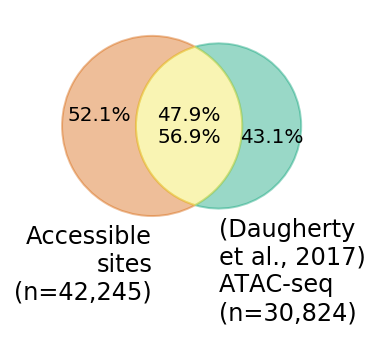

In [3]:
gv = yp.GenomicVenn2(
    BedTool.from_dataframe(regl_Apr27()[yp.NAMES_BED3]),
    BedTool.from_dataframe(df_Daugherty2017),
    label_a='Accessible\nsites',
    label_b='(Daugherty\net al., 2017)\nATAC-seq',
)

fig = plt.figure(figsize=(3,2))
plt.subplot(1,1,1)
v = gv.plot(style='compact')#fudge_labels_to_top=True)
v.get_patch_by_id('10').set_color(yp.RED)
v.get_patch_by_id('01').set_color(yp.GREEN)
v.get_patch_by_id('11').set_color(yp.YELLOW)

plt.savefig('annot_Apr27/Fig2S1BL_Daugherty2017.pdf', bbox_inches='tight', transparent=True)

In [4]:
gdf_a_w_b = yp.GenomicDataFrame(gv.df_a_with_b)
gdf_b_w_a = yp.GenomicDataFrame(gv.df_b_with_a)
gdf_a_only = yp.GenomicDataFrame(gv.df_a_only)
gdf_b_only = yp.GenomicDataFrame(gv.df_b_only)

l_gdf = [gdf_a_w_b, gdf_b_w_a, gdf_a_only, gdf_b_only]
for gdf_ in l_gdf:
    fp_ = 'annot/Fig2S1_overlaps/modERN_modENCODE/modERN_modENCODE_peak_pileup.bw'
    gdf_.add_track('TFBS_peak_calls', fp_, flank_len=1000, bin_size=5)
    fp_ = 'WS260_ce10/WS260_ce10.exon_coverage_unstranded.bw'
    gdf_.add_track('exon_coverage', fp_, flank_len=1000, bin_size=5)
    gdf_.add_track('txn_initiation_fwd', config['annot_ce10']['fp_scap_fwd'], bin_size=1, flank_len=500)
    gdf_.add_track('txn_initiation_rev', config['annot_ce10']['fp_scap_rev'], bin_size=1, flank_len=500)

gdf: pos_column unspecified, reverting to mean(start, end)
gdf: pos_column unspecified, reverting to mean(start, end)
gdf: pos_column unspecified, reverting to mean(start, end)
gdf: pos_column unspecified, reverting to mean(start, end)
mread_regions True modERN_modENCODE_peak_pileup.bw.mread_regions_f97a2d0c63b0af008e16f51cb8976b62.tmp
mread_regions True WS260_ce10.exon_coverage_unstranded.bw.mread_regions_0f17ad79c2d0152ffd4d6d407eb9d2fd.tmp
mread_regions True scap_wt_all_fwd.bw.mread_regions_76f74b9ca8fc36177625b04b9172380f.tmp
mread_regions True scap_wt_all_rev.bw.mread_regions_55ec9442d11004fc14a641232b734a13.tmp
mread_regions True modERN_modENCODE_peak_pileup.bw.mread_regions_7e397e712120f118a04432e8b84d4f66.tmp
mread_regions True WS260_ce10.exon_coverage_unstranded.bw.mread_regions_f09918c9abd24525b56c2a5e10f2cffa.tmp
mread_regions True scap_wt_all_fwd.bw.mread_regions_cded8953dbe8a9d74bd49f7911479a44.tmp
mread_regions True scap_wt_all_rev.bw.mread_regions_2eb02ba1452ac6e15bbde18

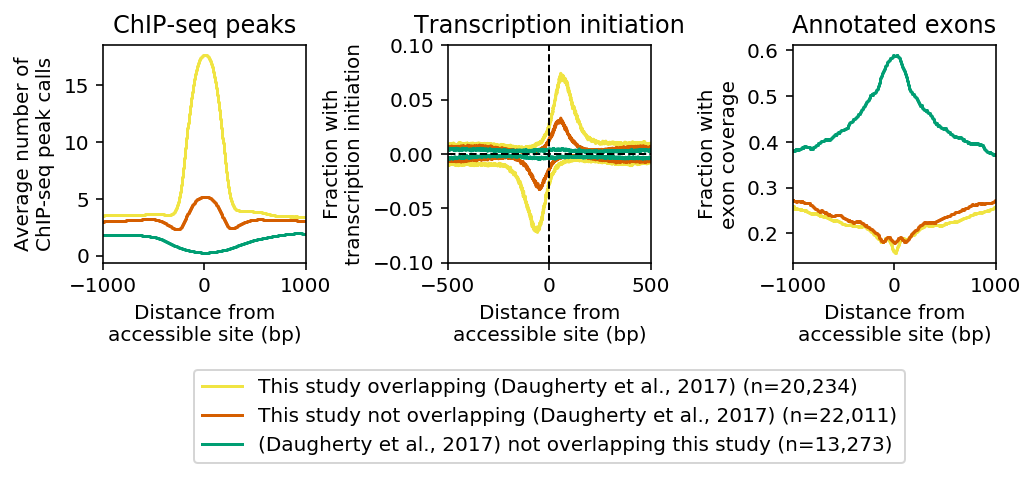

In [5]:
label_a_w_b = 'This study overlapping (Daugherty et al., 2017) (n=%s)' % (yp.f_uk(len(gv.df_a_with_b)),)
label_b_w_a = '(Daugherty et al., 2017) overlapping this study (n=%s)' % (yp.f_uk(len(gv.df_b_with_a)),)
label_a_only = 'This study not overlapping (Daugherty et al., 2017) (n=%s)' % (yp.f_uk(len(gv.df_a_only)),)
label_b_only = '(Daugherty et al., 2017) not overlapping this study (n=%s)' % (yp.f_uk(len(gv.df_b_only)),)

def mean_gt1_fwd(x, a):
    #x_ = np.nanmean(x, a)
    x_ = np.mean(x > 0, a)
    return x_

def mean_gt1_rev(x, a):
    #x_ = np.nanmean(x, a)
    x_ = np.mean(-x > 0, a)
    return -x_

fig = plt.figure(figsize=(8,2)).subplots_adjust(wspace=0.7)#hspace=2, 

plt.subplot(1,3,1)
plt.title('ChIP-seq peaks')
gdf_a_w_b.t['TFBS_peak_calls'].plot(label=label_a_w_b, color=yp.YELLOW)
#gdf_b_w_a.t['TFBS_peak_calls'].plot(label=label_b_w_a, color=yp.YELLOW, linestyle='dashed')
gdf_a_only.t['TFBS_peak_calls'].plot(label=label_a_only, color=yp.RED)
gdf_b_only.t['TFBS_peak_calls'].plot(label=label_b_only, color=yp.GREEN)
plt.xlabel('Distance from\naccessible site (bp)')
plt.ylabel('Average number of\nChIP-seq peak calls')
#plt.legend(loc='upper left')


plt.subplot(1,3,2)
plt.title('Transcription initiation')
gdf_a_w_b.t['txn_initiation_fwd'].plot(label=label_a_w_b, color=yp.YELLOW, f=mean_gt1_fwd)
#gdf_b_w_a.t['txn_initiation_fwd'].plot(label=label_b_w_a, color=yp.YELLOW, linestyle='dashed', f=mean_gt1_fwd)
gdf_a_only.t['txn_initiation_fwd'].plot(label=label_a_only, color=yp.RED, f=mean_gt1_fwd)
gdf_b_only.t['txn_initiation_fwd'].plot(label=label_b_only, color=yp.GREEN, f=mean_gt1_fwd)
gdf_a_w_b.t['txn_initiation_rev'].plot(label=label_a_w_b, color=yp.YELLOW, f=mean_gt1_rev)
#gdf_b_w_a.t['txn_initiation_rev'].plot(label=label_b_w_a, color=yp.YELLOW, linestyle='dashed', f=mean_gt1_rev)
gdf_a_only.t['txn_initiation_rev'].plot(label=label_a_only, color=yp.RED, f=mean_gt1_rev)
gdf_b_only.t['txn_initiation_rev'].plot(label=label_b_only, color=yp.GREEN, f=mean_gt1_rev)
plt.ylim(-.1, .1)
plt.axhline(0, color='k', linewidth=1, linestyle='dashed')
plt.axvline(0, color='k', linewidth=1, linestyle='dashed')
plt.xlabel('Distance from\naccessible site (bp)')
plt.ylabel('Fraction with\ntranscription initiation')
plt.legend(loc='lower center', borderaxespad=-10)#bbox_to_anchor=(-.07, 1.02, 1.15, .102), mode="expand", #, borderpad=4

plt.subplot(1,3,3)
plt.title('Annotated exons')
gdf_a_w_b.t['exon_coverage'].plot(label=label_a_w_b, color=yp.YELLOW)
#gdf_b_w_a.t['exon_coverage'].plot(label=label_b_w_a, color=yp.YELLOW, linestyle='dashed')
gdf_a_only.t['exon_coverage'].plot(label=label_a_only, color=yp.RED)
gdf_b_only.t['exon_coverage'].plot(label=label_b_only, color=yp.GREEN)
plt.xlabel('Distance from\naccessible site (bp)')
plt.ylabel('Fraction with\nexon coverage')

plt.savefig('annot_Apr27/Fig2S1BR_Daugherty2017.pdf', bbox_inches='tight', transparent=True)

In [6]:
#kwargs_ = {'header': False, 'sep': '\t', 'index': False}
#gv.df_a_with_b.to_csv('annot/FigA_overlaps/overlaps_Daugherty2017/%s.bed' % (label_a_w_b,), **kwargs_)
#gv.df_b_with_a.to_csv('annot/FigA_overlaps/overlaps_Daugherty2017/%s.bed' % (label_b_w_a,), **kwargs_)
#gv.df_a_only.to_csv('annot/FigA_overlaps/overlaps_Daugherty2017/%s.bed' % (label_a_only,), **kwargs_)
#gv.df_b_only.to_csv('annot/FigA_overlaps/overlaps_Daugherty2017/%s.bed' % (label_b_only,), **kwargs_)